<a href="https://colab.research.google.com/github/victormattos2013/Diabetes/blob/main/Desafio_Diabetes_Victor_Henrique_de_Mattos_Medeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Victor Henrique de Mattos Medeiros
###Atividade Diabetes

# Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dados = pd.read_csv('https://raw.githubusercontent.com/victormattos2013/Diabetes/refs/heads/main/diabetes.csv')
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1


In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [3]:
dados.describe()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,70.654822,29.106599,155.548223,32.988579,387.967662,0.329949
std,12.469919,10.504273,118.775855,7.210160,263.899703,0.470792
min,24.000000,7.000000,14.000000,0.000000,0.150000,0.000000
25%,62.000000,21.000000,76.250000,28.325000,198.250000,0.000000
50%,70.000000,29.000000,125.000000,33.200000,356.000000,0.000000
75%,78.000000,36.750000,190.000000,37.075000,586.750000,1.000000
max,110.000000,63.000000,846.000000,67.100000,997.000000,1.000000


In [4]:
dados.isnull().sum()

,0
glicemia,0
pressao_sanguinea,0
dobra_cutane_triceps,0
insulina,0
imc,0
diabetes,0


In [5]:
dados['diabetes'].value_counts()

,count
diabetes,
0,264
1,130


In [6]:
for col in dados.columns:
  print(col, dados[col].unique())

glicemia [ 66  40  50  70  60  72  84  30  88  94  82  76  58  64 110  80  90  68
  85  86  78  74  48  56  62  54  52  98  65  46 102 100  92  44  24  38
 106]
pressao_sanguinea [23 35 32 45 19 47 38 30 41 33 26 15 36 11 25 24 21 34 42 39 60 13 27 20
 29 40 18 51 28 31 56 14 37 50 12 46 44 16 22  7 52 10 17 43 48  8 49 63]
dobra_cutane_triceps [ 94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192 207
  70 240  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176  48
  64 228  76 220  40 152  18 135 495  37  51  99 145 225  49  50  92 325
  63 284 119 204 155 485  53 114 105 285 156  78 130  55  58 160 210 318
  44 190 280  87 271 129 120 478  56  32 744 370  45 194 680 402 258 375
 150  67  57 116 278 122 545  75  74 182 360 215 184  42 132 148 180 205
  85 231  29  68  52 255 171  73 108  43 167 249 293  66 465  89 158  84
  72  59  81 196 415 275 165 579 310  61 474 170 277  60  14  95 237 191
 328 250 480 265 193  79  86 326 188 106  65 166 274  77 126 330 600 

In [7]:
import plotly.express as px
px.histogram(dados, x = 'diabetes', text_auto = True) # variável alvo

In [8]:
px.histogram(dados, x = 'glicemia', text_auto = True) # variável alvo

In [9]:
px.histogram(dados, x = 'pressao_sanguinea', text_auto = True) # variável alvo

In [10]:
px.histogram(dados, x = 'dobra_cutane_triceps', text_auto = True) # variável alvo

In [11]:
px.histogram(dados, x = 'insulina', text_auto = True) # variável alvo

In [12]:
px.histogram(dados, x = 'imc', text_auto = True) # variável alvo

In [13]:
#utilizando over_sampling
from imblearn.over_sampling import SMOTE

#separar features e classes
X = dados.drop('diabetes', axis = 1)
y = dados['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Separação dos dados de treino e teste

SEED = 5

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = SEED)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [15]:
#DecisionTreeClassifier
#max_depth 5

dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtc.fit(train_x, train_y) #Treinando o modelo

dtc_accuracy = dtc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo decision tree foi de {dtc_accuracy:.2f} %')

A Acurácia do modelo decision tree foi de 68.69 %


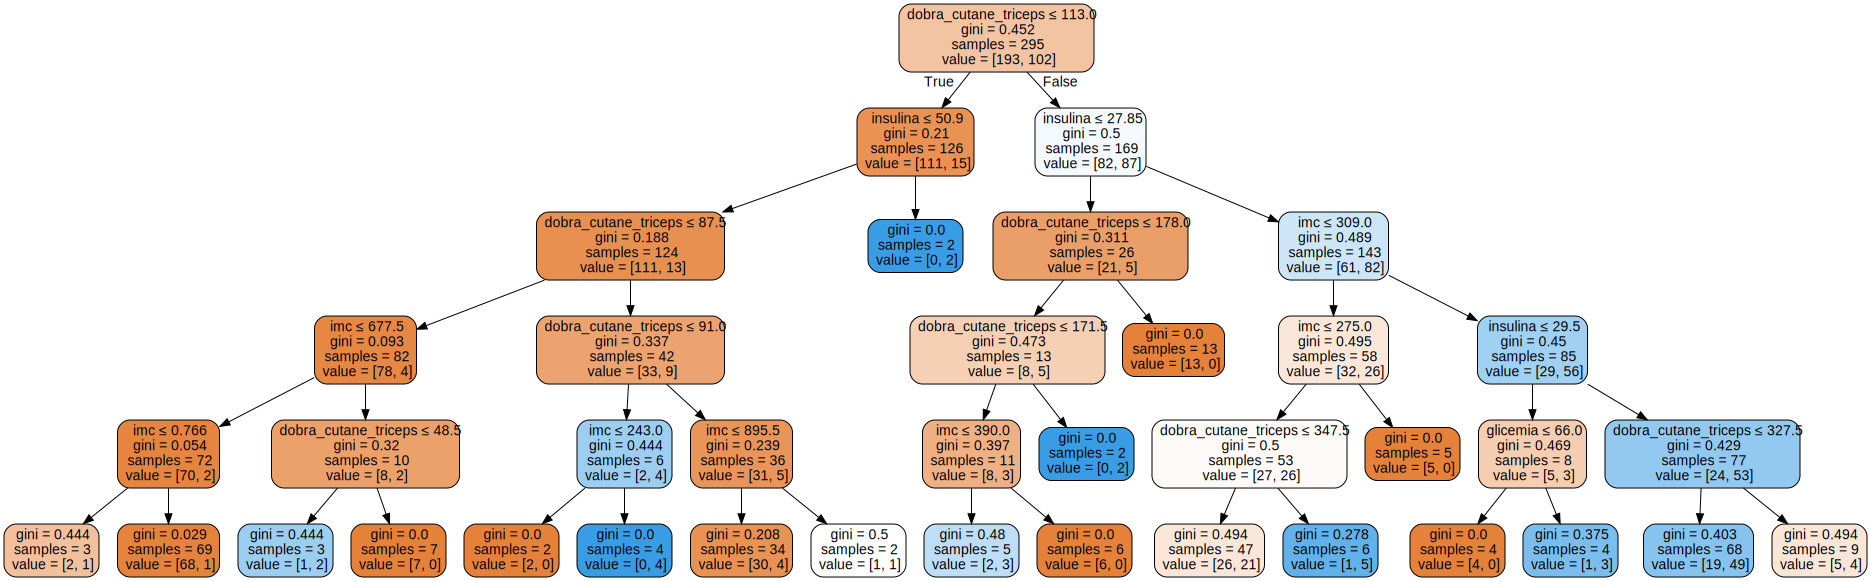

In [16]:
#Gráfico árvore de decisão

from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(dtc, out_file = None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters=True)
grafico = graphviz.Source(dot_data)
grafico

In [17]:
#DecisionTreeClassifier
#max_depth 7

dtc = DecisionTreeClassifier(max_depth=7, random_state=SEED) #Istanciando o modelo
dtc.fit(train_x, train_y) #Treinando o modelo

dtc_accuracy = dtc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo decision tree foi de {dtc_accuracy:.2f} %')

A Acurácia do modelo decision tree foi de 71.72 %


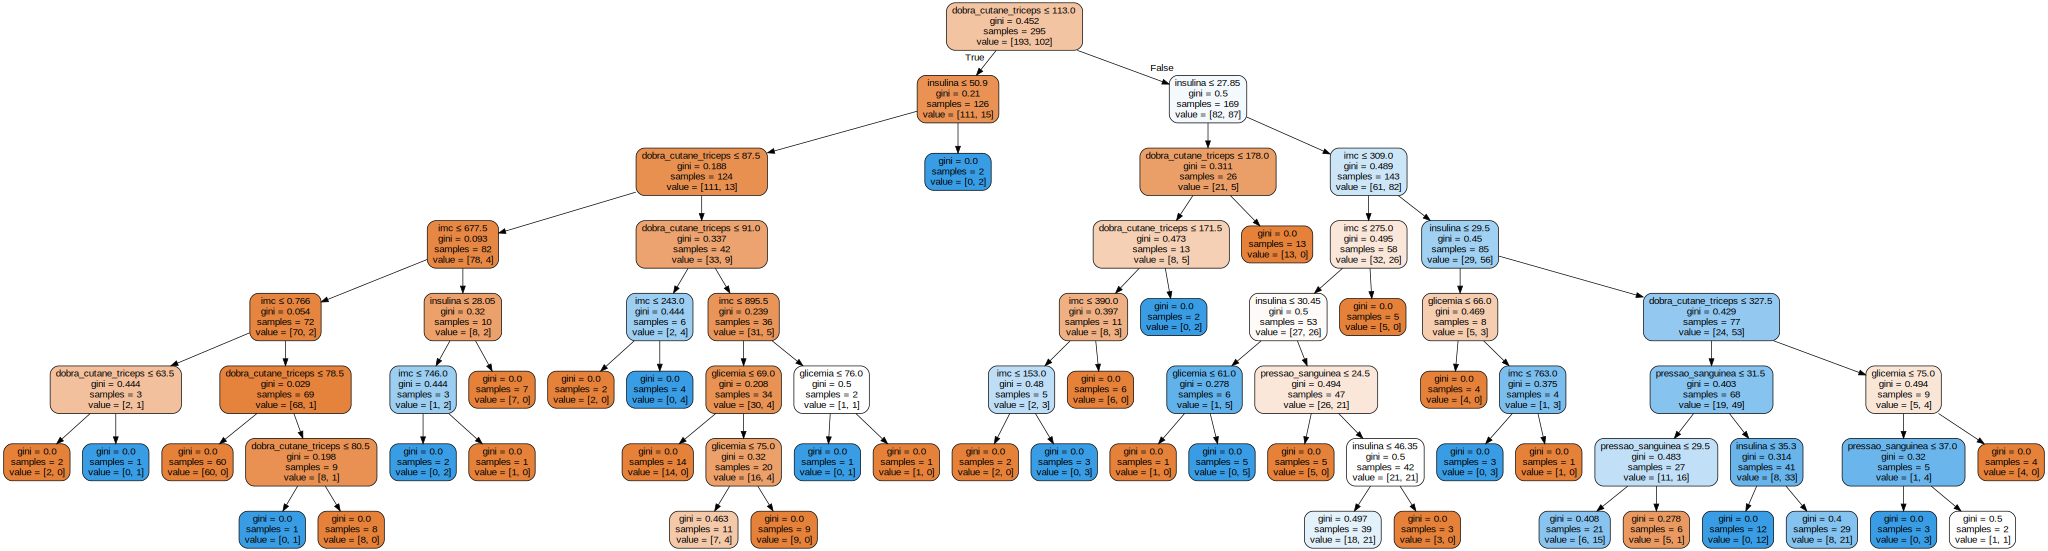

In [18]:
#Gráfico árvore de decisão

from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(dtc, out_file = None,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters=True)
grafico = graphviz.Source(dot_data)
grafico

In [19]:
#RandomForestClassifier
#max_depth 5
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=SEED)
rfc.fit(train_x, train_y)

rfc_accuracy = rfc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo random forest foi de {rfc_accuracy:.2f} %')

A Acurácia do modelo random forest foi de 75.76 %


In [20]:
#RandomForestClassifier
#max_depth 7

rfc = RandomForestClassifier(max_depth=7, random_state=SEED)
rfc.fit(train_x, train_y)

rfc_accuracy = rfc.score(test_x, test_y) * 100
print(f'A Acurácia do modelo random forest foi de {rfc_accuracy:.2f} %')

A Acurácia do modelo random forest foi de 71.72 %


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

####Método decision tree

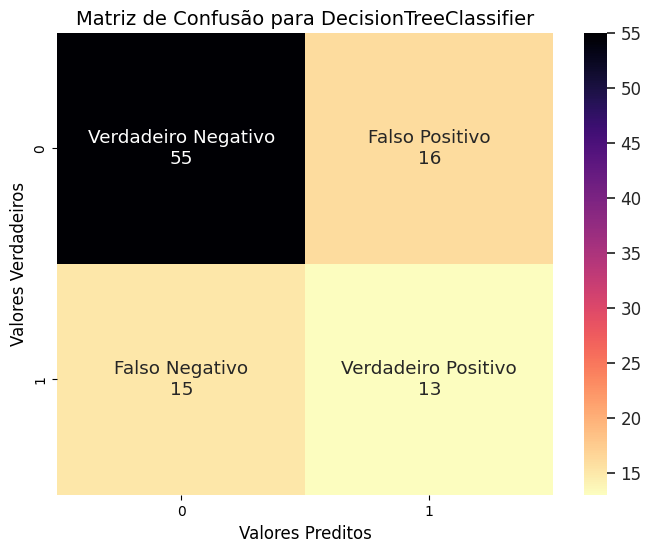

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Modelo DecisionTreeClassifier
#max_depth 5
dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtc.fit(train_x, train_y)
dtc_pred = dtc.predict(test_x)

# Matriz de confusão para DecisionTreeClassifier
cm_dtc = confusion_matrix(test_y, dtc_pred, labels=dtc.classes_)

# Função para gerar matriz de confusão customizada
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    # Contagem de elementos em cada célula
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    # Rótulos para cada célula combinando o label e a contagem
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    # Configuração do plot
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    # Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    # Definições de rótulos dos eixos e título
    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para DecisionTreeClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

# Definindo categorias e labels
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Chamando a função para gerar a matriz de confusão
gerando_matriz(cm_dtc, labels, categorias, cmap="magma_r")
plt.show()

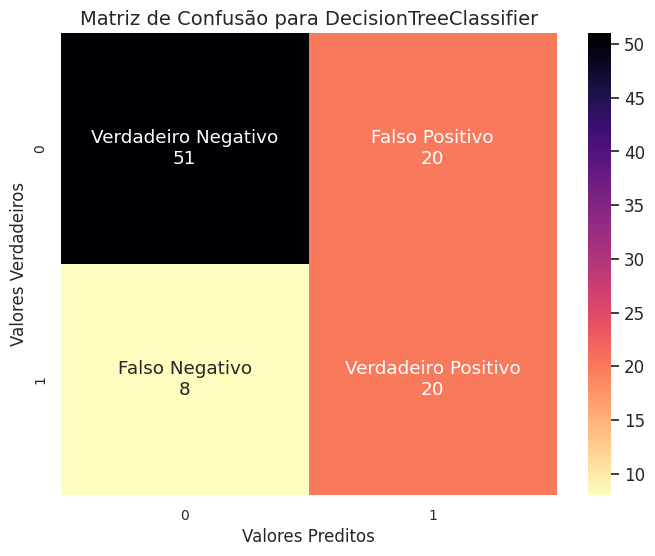

In [22]:
# Modelo DecisionTreeClassifier
#max_depth 7
dtc = DecisionTreeClassifier(max_depth=7, random_state=SEED)
dtc.fit(train_x, train_y)
dtc_pred = dtc.predict(test_x)

# Matriz de confusão para DecisionTreeClassifier
cm_dtc = confusion_matrix(test_y, dtc_pred, labels=dtc.classes_)

# Função para gerar matriz de confusão customizada
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    # Contagem de elementos em cada célula
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    # Rótulos para cada célula combinando o label e a contagem
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    # Configuração do plot
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    # Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    # Definições de rótulos dos eixos e título
    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para DecisionTreeClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

# Definindo categorias e labels
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Chamando a função para gerar a matriz de confusão
gerando_matriz(cm_dtc, labels, categorias, cmap="magma_r")
plt.show()

###Método Random forest

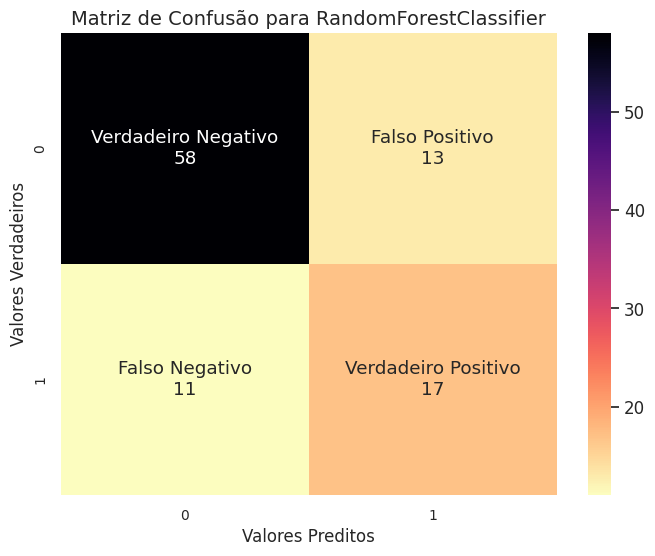

In [23]:
# Modelo RandomForestClassifier
#max_depth 5
rfc = RandomForestClassifier(max_depth=5, random_state=SEED)
rfc.fit(train_x, train_y)
rfc_pred = rfc.predict(test_x)

# Matriz de confusão para RandomForestClassifier
cm_rfc = confusion_matrix(test_y, rfc_pred, labels=rfc.classes_)

# Função para gerar matriz de confusão customizada
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    # Contagem de elementos em cada célula
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    # Rótulos para cada célula combinando o label e a contagem
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    # Configuração do plot
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    # Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    # Definições de rótulos dos eixos e título
    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para RandomForestClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

# Definindo categorias e labels
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Chamando a função para gerar a matriz de confusão
gerando_matriz(cm_rfc, labels, categorias, cmap="magma_r")
plt.show()

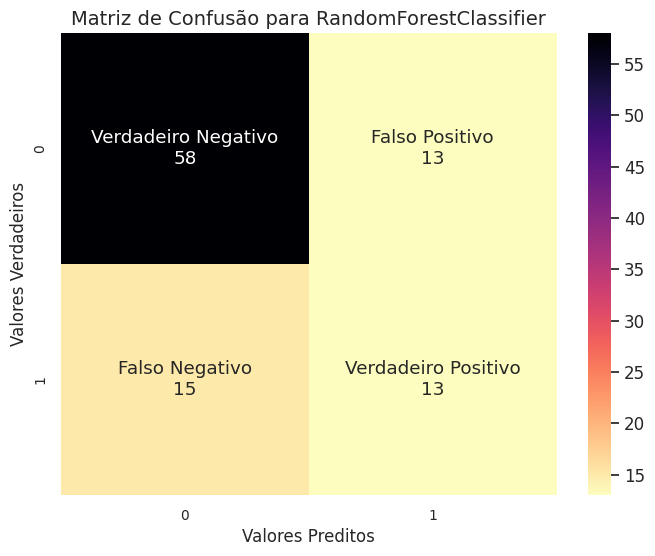

In [24]:
# Modelo RandomForestClassifier
#max_depth 7
rfc = RandomForestClassifier(max_depth=7, random_state=SEED)
rfc.fit(train_x, train_y)
rfc_pred = rfc.predict(test_x)

# Matriz de confusão para RandomForestClassifier
cm_rfc = confusion_matrix(test_y, rfc_pred, labels=rfc.classes_)

# Função para gerar matriz de confusão customizada
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    # Contagem de elementos em cada célula
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    # Rótulos para cada célula combinando o label e a contagem
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    # Configuração do plot
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    # Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    # Definições de rótulos dos eixos e título
    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para RandomForestClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

# Definindo categorias e labels
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

# Chamando a função para gerar a matriz de confusão
gerando_matriz(cm_rfc, labels, categorias, cmap="magma_r")
plt.show()

### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Modelo DecisionTreeClassifier com max_depth 5
dtc5 = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtc5.fit(train_x, train_y)
dtc5_pred = dtc5.predict(test_x)

# Modelo DecisionTreeClassifier com max_depth 7
dtc7 = DecisionTreeClassifier(max_depth=7, random_state=SEED)
dtc7.fit(train_x, train_y)
dtc7_pred = dtc7.predict(test_x)

# Modelo RandomForestClassifier com max_depth 5
rfc5 = RandomForestClassifier(max_depth=5, random_state=SEED)
rfc5.fit(train_x, train_y)
rfc5_pred = rfc5.predict(test_x)

# Modelo RandomForestClassifier com max_depth 7
rfc7 = RandomForestClassifier(max_depth=7, random_state=SEED)
rfc7.fit(train_x, train_y)
rfc7_pred = rfc7.predict(test_x)

# Calculando as métricas para cada modelo
models = [dtc5, dtc7, rfc5, rfc7]
model_names = ["DecisionTreeClassifier (max_depth=5)",
               "DecisionTreeClassifier (max_depth=7)",
               "RandomForestClassifier (max_depth=5)",
               "RandomForestClassifier (max_depth=7)"]

for model, name in zip(models, model_names):
    print(f"Métricas para o modelo {name}:")
    print(f"Acurácia: {accuracy_score(test_y, model.predict(test_x)):.2f}")
    print(f"Recall: {recall_score(test_y, model.predict(test_x)):.2f}")
    print(f"Precisão: {precision_score(test_y, model.predict(test_x)):.2f}")
    print(f"F1-Score: {f1_score(test_y, model.predict(test_x)):.2f}")

Métricas para o modelo DecisionTreeClassifier (max_depth=5):
Acurácia: 0.69
Recall: 0.46
Precisão: 0.45
F1-Score: 0.46
Métricas para o modelo DecisionTreeClassifier (max_depth=7):
Acurácia: 0.72
Recall: 0.71
Precisão: 0.50
F1-Score: 0.59
Métricas para o modelo RandomForestClassifier (max_depth=5):
Acurácia: 0.76
Recall: 0.61
Precisão: 0.57
F1-Score: 0.59
Métricas para o modelo RandomForestClassifier (max_depth=7):
Acurácia: 0.72
Recall: 0.46
Precisão: 0.50
F1-Score: 0.48


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Modelos DecisionTreeClassifier
dtc5 = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtc7 = DecisionTreeClassifier(max_depth=7, random_state=SEED)

# Modelos RandomForestClassifier
rfc5 = RandomForestClassifier(max_depth=5, random_state=SEED)
rfc7 = RandomForestClassifier(max_depth=7, random_state=SEED)

# Treinando os modelos
dtc5.fit(train_x, train_y)
dtc7.fit(train_x, train_y)
rfc5.fit(train_x, train_y)
rfc7.fit(train_x, train_y)

# Calculando as probabilidades de predição para cada modelo
dtc5_probs = dtc5.predict_proba(test_x)[:, 1]
dtc7_probs = dtc7.predict_proba(test_x)[:, 1]
rfc5_probs = rfc5.predict_proba(test_x)[:, 1]
rfc7_probs = rfc7.predict_proba(test_x)[:, 1]

# Calculando a curva ROC para cada modelo
fpr_dtc5, tpr_dtc5, _ = roc_curve(test_y, dtc5_probs)
fpr_dtc7, tpr_dtc7, _ = roc_curve(test_y, dtc7_probs)
fpr_rfc5, tpr_rfc5, _ = roc_curve(test_y, rfc5_probs)
fpr_rfc7, tpr_rfc7, _ = roc_curve(test_y, rfc7_probs)

# Calculando a AUC para cada modelo
auc_dtc5 = auc(fpr_dtc5, tpr_dtc5)
auc_dtc7 = auc(fpr_dtc7, tpr_dtc7)
auc_rfc5 = auc(fpr_rfc5, tpr_rfc5)
auc_rfc7 = auc(fpr_rfc7, tpr_rfc7)

In [27]:
print(f"AUC para DecisionTreeClassifier (max_depth=5): {auc_dtc5:.2f}")
print(f"AUC para DecisionTreeClassifier (max_depth=7): {auc_dtc7:.2f}")
print(f"AUC para RandomForestClassifier (max_depth=5): {auc_rfc5:.2f}")
print(f"AUC para RandomForestClassifier (max_depth=7): {auc_rfc7:.2f}")

print("\nPrimeiros 5 valores de FPR e TPR para DecisionTreeClassifier (max_depth=5):")
print(f"FPR: {fpr_dtc5[:5]}")
print(f"TPR: {tpr_dtc5[:5]}")

print("\nPrimeiros 5 valores de FPR e TPR para DecisionTreeClassifier (max_depth=7):")
print(f"FPR: {fpr_dtc7[:5]}")
print(f"TPR: {tpr_dtc7[:5]}")

print("\nPrimeiros 5 valores de FPR e TPR para RandomForestClassifier (max_depth=5):")
print(f"FPR: {fpr_rfc5[:5]}")
print(f"TPR: {tpr_rfc5[:5]}")

print("\nPrimeiros 5 valores de FPR e TPR para RandomForestClassifier (max_depth=7):")
print(f"FPR: {fpr_rfc7[:5]}")
print(f"TPR: {tpr_rfc7[:5]}")

AUC para DecisionTreeClassifier (max_depth=5): 0.69
AUC para DecisionTreeClassifier (max_depth=7): 0.72
AUC para RandomForestClassifier (max_depth=5): 0.74
AUC para RandomForestClassifier (max_depth=7): 0.73

Primeiros 5 valores de FPR e TPR para DecisionTreeClassifier (max_depth=5):
FPR: [0.         0.02816901 0.04225352 0.1971831  0.22535211]
TPR: [0.         0.07142857 0.17857143 0.46428571 0.46428571]

Primeiros 5 valores de FPR e TPR para DecisionTreeClassifier (max_depth=7):
FPR: [0.         0.05633803 0.09859155 0.1971831  0.28169014]
TPR: [0.         0.25       0.35714286 0.42857143 0.71428571]

Primeiros 5 valores de FPR e TPR para RandomForestClassifier (max_depth=5):
FPR: [0.         0.01408451 0.01408451 0.07042254 0.07042254]
TPR: [0.         0.         0.03571429 0.03571429 0.21428571]

Primeiros 5 valores de FPR e TPR para RandomForestClassifier (max_depth=7):
FPR: [0.         0.01408451 0.04225352 0.04225352 0.05633803]
TPR: [0.         0.         0.         0.03571429 

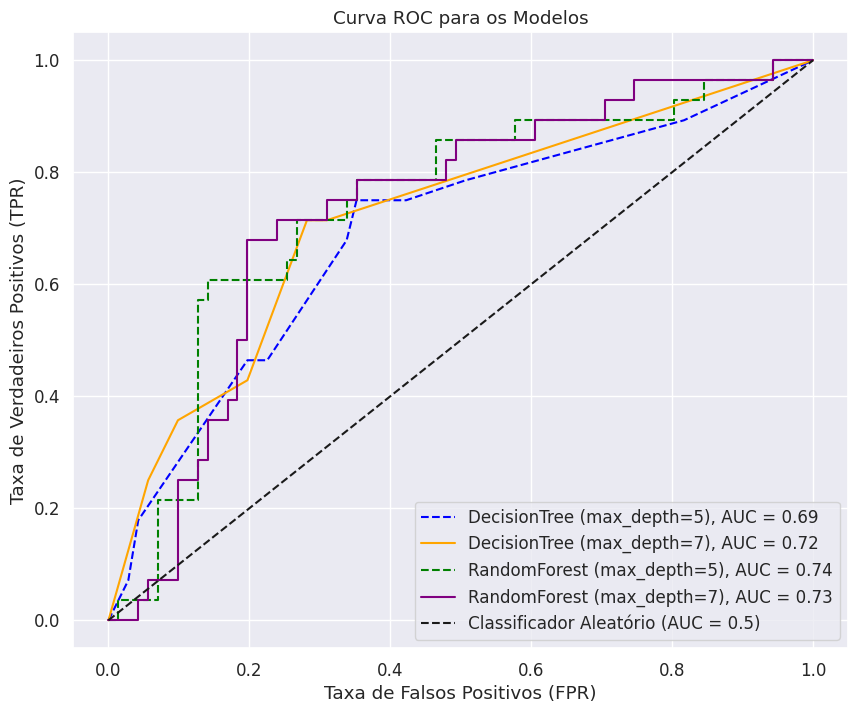

In [28]:
#Curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_dtc5, tpr_dtc5, label=f'DecisionTree (max_depth=5), AUC = {auc_dtc5:.2f}', linestyle='--', color='blue')
plt.plot(fpr_dtc7, tpr_dtc7, label=f'DecisionTree (max_depth=7), AUC = {auc_dtc7:.2f}', linestyle='-', color='orange')
plt.plot(fpr_rfc5, tpr_rfc5, label=f'RandomForest (max_depth=5), AUC = {auc_rfc5:.2f}', linestyle='--', color='green')
plt.plot(fpr_rfc7, tpr_rfc7, label=f'RandomForest (max_depth=7), AUC = {auc_rfc7:.2f}', linestyle='-', color='purple')

# Linha base para referência
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório (AUC = 0.5)')

plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC para os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

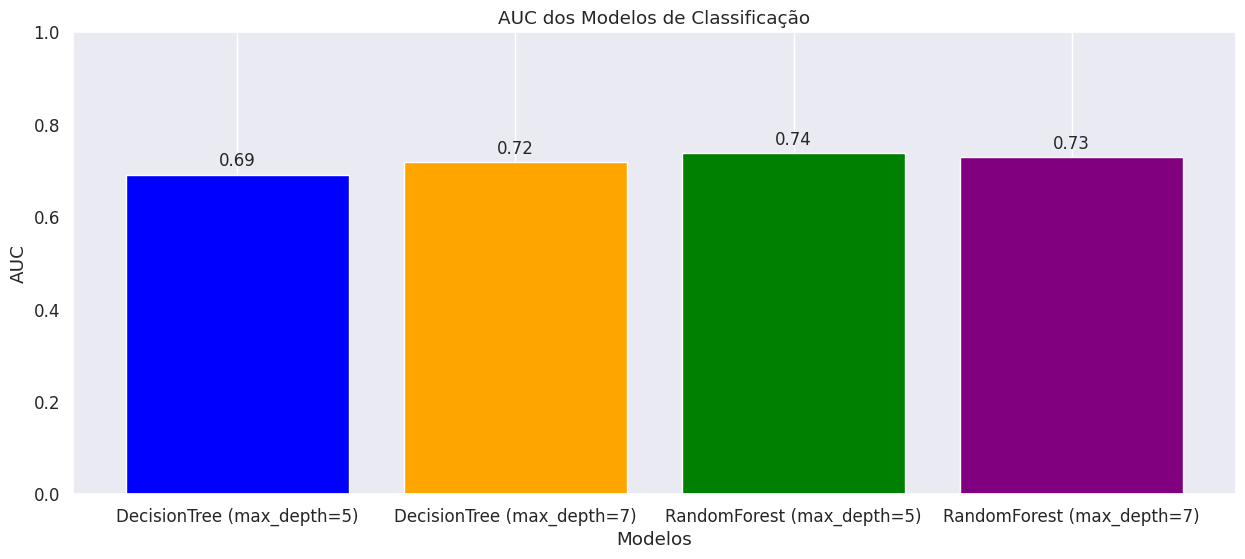

In [29]:
#Valores AUC
plt.figure(figsize=(15, 6))
modelos = ['DecisionTree (max_depth=5)', 'DecisionTree (max_depth=7)',
           'RandomForest (max_depth=5)', 'RandomForest (max_depth=7)']
valores_auc = [auc_dtc5, auc_dtc7, auc_rfc5, auc_rfc7]

bars = plt.bar(modelos, valores_auc, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)
plt.xlabel('Modelos')
plt.ylabel('AUC')
plt.title('AUC dos Modelos de Classificação')
plt.grid(axis='y')

# Adicionando os valores de AUC em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.01,  # ligeiramente acima da barra
        f'{yval:.2f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Exibindo o gráfico de barras
plt.show()

### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculando as probabilidades de predição para cada modelo
dtc5_probs = dtc5.predict_proba(test_x)[:, 1]
dtc7_probs = dtc7.predict_proba(test_x)[:, 1]
rfc5_probs = rfc5.predict_proba(test_x)[:, 1]
rfc7_probs = rfc7.predict_proba(test_x)[:, 1]

# Calculando a curva de precisão vs. recall para cada modelo
precision_dtc5, recall_dtc5, _ = precision_recall_curve(test_y, dtc5_probs)
precision_dtc7, recall_dtc7, _ = precision_recall_curve(test_y, dtc7_probs)
precision_rfc5, recall_rfc5, _ = precision_recall_curve(test_y, rfc5_probs)
precision_rfc7, recall_rfc7, _ = precision_recall_curve(test_y, rfc7_probs)

# Calculando a AP (Average Precision) para cada modelo
ap_dtc5 = average_precision_score(test_y, dtc5_probs)
ap_dtc7 = average_precision_score(test_y, dtc7_probs)
ap_rfc5 = average_precision_score(test_y, rfc5_probs)
ap_rfc7 = average_precision_score(test_y, rfc7_probs)

# Prints dos resultados de AP
print(f"AP para DecisionTreeClassifier (max_depth=5): {ap_dtc5:.2f}")
print(f"AP para DecisionTreeClassifier (max_depth=7): {ap_dtc7:.2f}")
print(f"AP para RandomForestClassifier (max_depth=5): {ap_rfc5:.2f}")
print(f"AP para RandomForestClassifier (max_depth=7): {ap_rfc7:.2f}")

AP para DecisionTreeClassifier (max_depth=5): 0.44
AP para DecisionTreeClassifier (max_depth=7): 0.48
AP para RandomForestClassifier (max_depth=5): 0.48
AP para RandomForestClassifier (max_depth=7): 0.44


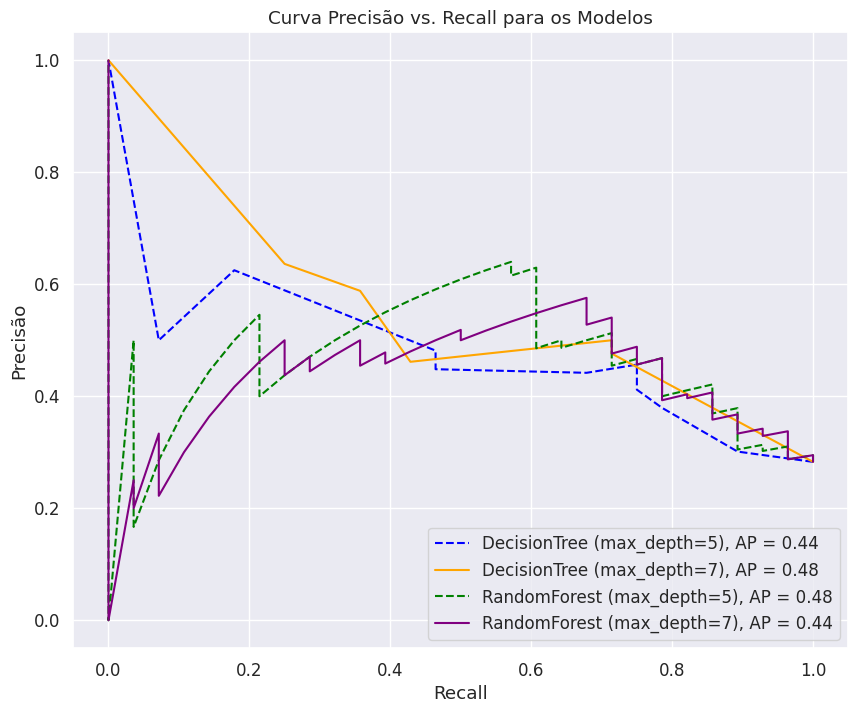

In [31]:
#Curvas de precisão vs. recall
plt.figure(figsize=(10, 8))
plt.plot(recall_dtc5, precision_dtc5, label=f'DecisionTree (max_depth=5), AP = {ap_dtc5:.2f}', linestyle='--', color='blue')
plt.plot(recall_dtc7, precision_dtc7, label=f'DecisionTree (max_depth=7), AP = {ap_dtc7:.2f}', linestyle='-', color='orange')
plt.plot(recall_rfc5, precision_rfc5, label=f'RandomForest (max_depth=5), AP = {ap_rfc5:.2f}', linestyle='--', color='green')
plt.plot(recall_rfc7, precision_rfc7, label=f'RandomForest (max_depth=7), AP = {ap_rfc7:.2f}', linestyle='-', color='purple')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão vs. Recall para os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [32]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Lista de modelos e nomes
models = [dtc5, dtc7, rfc5, rfc7]
model_names = ['DecisionTree (max_depth=5)', 'DecisionTree (max_depth=7)',
               'RandomForest (max_depth=5)', 'RandomForest (max_depth=7)']

# Gerando os relatórios de classificação para cada modelo e formatando em tabela
for model, name in zip(models, model_names):
    print(f"Relatório de Classificação para o modelo {name}:")

    # Gerando o relatório de classificação como dicionário
    report_dict = classification_report(test_y, model.predict(test_x), output_dict=True)

    # Convertendo o relatório para um formato tabulado
    report_table = []

    # Preenchendo a tabela com as métricas
    for label, metrics in report_dict.items():
        if label in ['accuracy', 'macro avg', 'weighted avg']:
            continue  # Ignorar essas linhas para um formato mais limpo

        row = [label] + [metrics[metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(row)

    # Adicionando precisão, recall e f1-score
    averages = ['macro avg', 'weighted avg']
    for avg in averages:
        avg_row = [avg] + [report_dict[avg][metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(avg_row)

    # Exibindo a tabela com tabulate
    headers = ['Classe', 'Precisão', 'Recall', 'F1-Score', 'Suporte']
    print(tabulate(report_table, headers=headers, tablefmt='grid'))

Relatório de Classificação para o modelo DecisionTree (max_depth=5):
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1-Score |   Suporte |
+==============+============+==========+============+===========+
| 0            |   0.785714 | 0.774648 |   0.780142 |        71 |
+--------------+------------+----------+------------+-----------+
| 1            |   0.448276 | 0.464286 |   0.45614  |        28 |
+--------------+------------+----------+------------+-----------+
| macro avg    |   0.616995 | 0.619467 |   0.618141 |        99 |
+--------------+------------+----------+------------+-----------+
| weighted avg |   0.690277 | 0.686869 |   0.688505 |        99 |
+--------------+------------+----------+------------+-----------+
Relatório de Classificação para o modelo DecisionTree (max_depth=7):
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1-Score |   Suporte |
+===

### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [33]:
import numpy as np

def intervalo_confianca_cv(resultados_cv, nome_modelo):
    media = np.mean(resultados_cv)
    desvio_padrao = np.std(resultados_cv)
    intervalo_minimo = media - 2 * desvio_padrao
    intervalo_maximo = media + 2 * desvio_padrao
    resultado_formatado = f'Intervalo de confiança ({nome_modelo}): [{intervalo_minimo:.2f}, {intervalo_maximo:.2f}]'
    return resultado_formatado

resultados_cv = [0.89, 0.88, 0.85, 0.86, 0.87]
nome_modelo = 'RandomForest'
print(intervalo_confianca_cv(resultados_cv, nome_modelo))


Intervalo de confiança (RandomForest): [0.84, 0.90]


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [34]:
from sklearn.model_selection import KFold, cross_val_score

# Lista de modelos e nomes
models = [dtc5, dtc7, rfc5, rfc7]
model_names = ['DecisionTree (max_depth=5)', 'DecisionTree (max_depth=7)',
               'RandomForest (max_depth=5)', 'RandomForest (max_depth=7)']

# Configuração da validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Avaliação dos modelos com validação cruzada
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, train_x, train_y, cv=kf)

    # Calculando o intervalo de confiança
    intervalo = intervalo_confianca_cv(cv_scores, name)
    print(intervalo)

Intervalo de confiança (DecisionTree (max_depth=5)): [0.50, 0.81]
Intervalo de confiança (DecisionTree (max_depth=7)): [0.41, 0.79]
Intervalo de confiança (RandomForest (max_depth=5)): [0.52, 0.84]
Intervalo de confiança (RandomForest (max_depth=7)): [0.48, 0.85]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [35]:
from sklearn.model_selection import StratifiedKFold

# Lista de modelos e nomes
models = [dtc5, dtc7, rfc5, rfc7]
model_names = ['DecisionTree (max_depth=5)', 'DecisionTree (max_depth=7)',
               'RandomForest (max_depth=5)', 'RandomForest (max_depth=7)']

# Configuração da validação cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Avaliação dos modelos com validação cruzada estratificada e métrica F1-Score
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, train_x, train_y, cv=skf, scoring='f1')

    # Calculando o intervalo de confiança
    intervalo = intervalo_confianca_cv(cv_scores, name)
    print(intervalo)

Intervalo de confiança (DecisionTree (max_depth=5)): [0.28, 0.73]
Intervalo de confiança (DecisionTree (max_depth=7)): [0.19, 0.64]
Intervalo de confiança (RandomForest (max_depth=5)): [0.26, 0.73]
Intervalo de confiança (RandomForest (max_depth=7)): [0.20, 0.75]


### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [36]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

# Lista de modelos e nomes
models = [dtc5, dtc7, rfc5, rfc7]
model_names = ['DecisionTree (max_depth=5)', 'DecisionTree (max_depth=7)',
               'RandomForest (max_depth=5)', 'RandomForest (max_depth=7)']

# Configuração da validação cruzada LeaveOneOut
loo = LeaveOneOut()

# Avaliação dos modelos com validação cruzada LeaveOneOut
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, train_x, train_y, cv=loo)

    # Calculando a média dos resultados
    media_acuracia = np.mean(cv_scores)
    print(f"Acurácia média para {name} com LeaveOneOut: {media_acuracia:.2f}")


Acurácia média para DecisionTree (max_depth=5) com LeaveOneOut: 0.54
Acurácia média para DecisionTree (max_depth=7) com LeaveOneOut: 0.63
Acurácia média para RandomForest (max_depth=5) com LeaveOneOut: 0.67
Acurácia média para RandomForest (max_depth=7) com LeaveOneOut: 0.66


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

Proporção de dados por classe na variável alvo 'diabetes':
+--------+-------------------+
| Classe |   Proporção (%)   |
+--------+-------------------+
|  0.0   | 67.00507614213198 |
|  1.0   | 32.99492385786802 |
+--------+-------------------+


<ipython-input-37-a3df429e1810>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




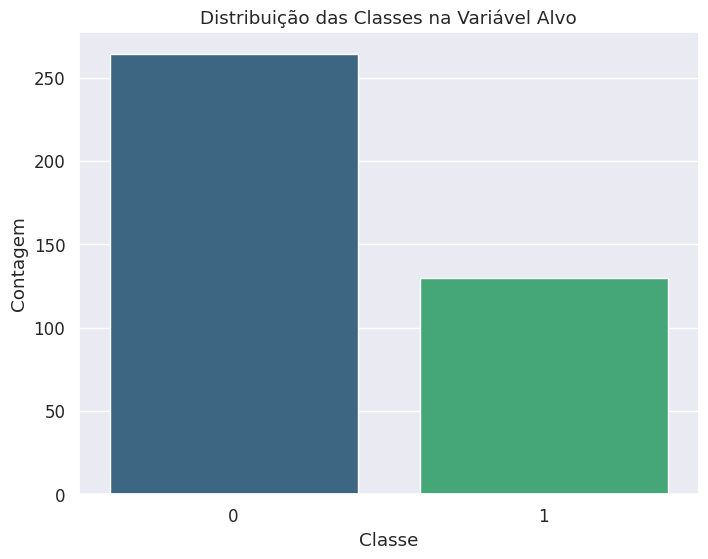

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Verificar a proporção de cada classe na variável alvo 'diabetes'
proporcoes = dados['diabetes'].value_counts(normalize=True) * 100

# Exibir os resultados em formato tabulado
proporcoes_df = proporcoes.reset_index()
proporcoes_df.columns = ['Classe', 'Proporção (%)']

print("Proporção de dados por classe na variável alvo 'diabetes':")
print(tabulate(proporcoes_df, headers='keys', tablefmt='pretty', showindex=False))

# Visualização com um gráfico de contagem
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=dados, palette='viridis')
plt.title('Distribuição das Classes na Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [38]:
import numpy as np
from imblearn.pipeline import Pipeline

# Configuração da validação cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Criando o pipeline com SMOTE e o modelo
pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=SEED)),
    ('modelo', rfc5)
])

# Calculando a média do F1-Score com validação cruzada estratificada
cv_scores = cross_val_score(pipeline, train_x, train_y, cv=skf, scoring='f1')
media_f1_score = np.mean(cv_scores)

print(f"Média do F1-Score com SMOTE e validação cruzada: {media_f1_score:.2f}")


Média do F1-Score com SMOTE e validação cruzada: 0.64


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [39]:
import numpy as np
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Configuração da validação cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)

# Exemplo de modelo RandomForest
rfc5 = RandomForestClassifier(max_depth=5, random_state=SEED)

# Criando o pipeline com NearMiss e o modelo
pipeline = Pipeline([
    ('undersampling', NearMiss(version=3)),  # Sem 'random_state'
    ('modelo', rfc5)
])

# Calculando a média do F1-Score com validação cruzada estratificada
cv_scores = cross_val_score(pipeline, train_x, train_y, cv=skf, scoring='f1')
media_f1_score = np.mean(cv_scores)

print(f"Média do F1-Score com NearMiss e validação cruzada: {media_f1_score:.2f}")

Média do F1-Score com NearMiss e validação cruzada: 0.63


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [40]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Exemplo de modelo RandomForest
rfc5 = RandomForestClassifier(max_depth=5, random_state=SEED)

# Criando o pipeline com SMOTE e o modelo
melhor_pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=SEED)),
    ('modelo', rfc5)
])

# Ajustando o pipeline aos dados de treino
melhor_pipeline.fit(train_x, train_y)

# Fazendo previsões nos dados de teste
y_pred = melhor_pipeline.predict(test_x)

# Gerando o relatório de classificação
report = classification_report(test_y, y_pred, output_dict=True)

# Convertendo o relatório de classificação para DataFrame para exibição tabulada
report_df = pd.DataFrame(report).transpose()

print("Desempenho do Modelo com Oversampling (SMOTE):")
print(report_df)

Desempenho do Modelo com Oversampling (SMOTE):
              precision    recall  f1-score    support
0              0.857143  0.676056  0.755906  71.000000
1              0.465116  0.714286  0.563380  28.000000
accuracy       0.686869  0.686869  0.686869   0.686869
macro avg      0.661130  0.695171  0.659643  99.000000
weighted avg   0.746267  0.686869  0.701454  99.000000
